# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2383 Шмонова Наталья Александровна и Сериков Магжан. Вариант №11.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

## 1. Дискретный сигнал и его представление

Дискретный сигнал формируется путем дискретизации непрерывного сигнала с шагом $T$:
$$x[n] = x(nT), \quad n = 0, 1, 2, ..., N-1$$

Исходный аналоговый сигнал представляет собой линейную комбинацию гармоник:
$$x(t) = \sum_{k=1}^{11} A_k \cos(\omega_k t + \phi_k)$$
где $\omega_k \in [0, \pi]$ - частоты гармоник, $A_k$ - амплитуды, $\phi_k$ - начальные фазы.

## 2. Дискретное преобразование Фурье (ДПФ)

Для периодической последовательности ${x_k}$ с периодом $N$ ДПФ определяется как:
$$X(n) = \sum_{k=0}^{N-1} x_k e^{-i \frac{2\pi n}{N}k}, \quad n = 0...N-1$$

Спектр дискретного сигнала вычисляется через ДПФ по формуле:
$$X(n) = S\left(\frac{2\pi n}{N}\right)$$
где $S(\omega)$ - спектральная плотность сигнала.

## 3. Полиномиальные фильтры скользящего среднего

Общая форма нерекурсивного фильтра:
$$y_n = \sum_{k=0}^M c_k x_{n-k}$$
где $M$ - размер окна фильтрации.

### 3.1. Линейное сглаживание

Для полинома первой степени $y(t) = A + Bt$ передаточная функция имеет вид:
$$\tilde{H}_{2h+1}(f) = \frac{1}{2h+1} \cdot \frac{\sin(2\pi f(h + \frac{1}{2}))}{\sin(\pi f)}$$

**Практическая реализация:**
- Для 5 точек ($h=2$):
$$y_n = \frac{1}{5}(s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2})$$
- Для 9 точек ($h=4$):
$$y_n = \frac{1}{9}(s_{n-4} + s_{n-3} + s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2} + s_{n+3} + s_{n+4})$$

### 3.2. Сглаживание полиномом 2-й степени

Для квадратичного полинома $y(t) = A + Bt + Ct^2$ передаточная функция:
$$\tilde{H}_{2h+1}(f) = \frac{3}{8h^3 + 12h^2 - 2h - 3} \left[(-3h^2 - 3h + 1) + 2\sum_{k=1}^{h}(5k^2 - 3h^2 - 3h + 1)\cos(2\pi f k)\right]$$

**Практическая реализация:**
- Для 5 точек ($h=2$):
$$y_n = \frac{1}{35}(-3s_{n-2} + 12s_{n-1} + 17s_n + 12s_{n+1} - 3s_{n+2})$$
- Для 9 точек ($h=4$):
$$y_n = \frac{1}{231}(-21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_n + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4})$$

### 3.3. Сглаживание полиномом 4-й степени

Для полинома четвертой степени передаточная функция:
$$\tilde{H}_{2h+1}(f) = \frac{15}{128h^5 + 320h^4 - 320h^3 - 800h^2 + 72h + 180} \left[15h^4 + 30h^3 - 35h^2 - 50h + 12 + 2\sum_{k=1}^{h}(15h^4 + 30h^3 - 35h^2 - 50h + 12 - (70h^2 + 70h - 105)k^2 + 63k^4)\cos(2\pi f k)\right]$$

**Практическая реализация:**
- Для 7 точек ($h=3$):
$$y_n = \frac{1}{231}(5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_n + 75s_{n+1} - 30s_{n+2} + 5s_{n+3})$$
- Для 11 точек ($h=5$):
$$y_n = \frac{1}{429}(18s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_n + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n+5})$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Для выполнения лабораторной работы подключим необходимые библиотеки.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).


In [34]:
# Параметры
num_harmonics = 11
delta_omega = 0.1 * np.pi
frequencies = np.array([k * delta_omega for k in range(num_harmonics)])
N = 31  # количество отсчетов
T = 1   # шаг дискретизации
t = np.linspace(0, N * T, N + 1)

# Генерация случайных амплитуд и фаз
A_k = np.random.randint(1, 12, size=num_harmonics)
phi_k = np.random.uniform(0, 0.5, size=num_harmonics)

# Нормализация амплитуд
A_k_normalized = A_k / np.sum(A_k)

# Формирование сигнала
signal_continuous = np.zeros_like(t)
signal_discrete = np.zeros(N + 1)

for k in range(num_harmonics):
    signal_continuous += A_k_normalized[k] * np.cos(frequencies[k] * t + phi_k[k])
    signal_discrete += A_k_normalized[k] * np.cos(frequencies[k] * t + phi_k[k])

## Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

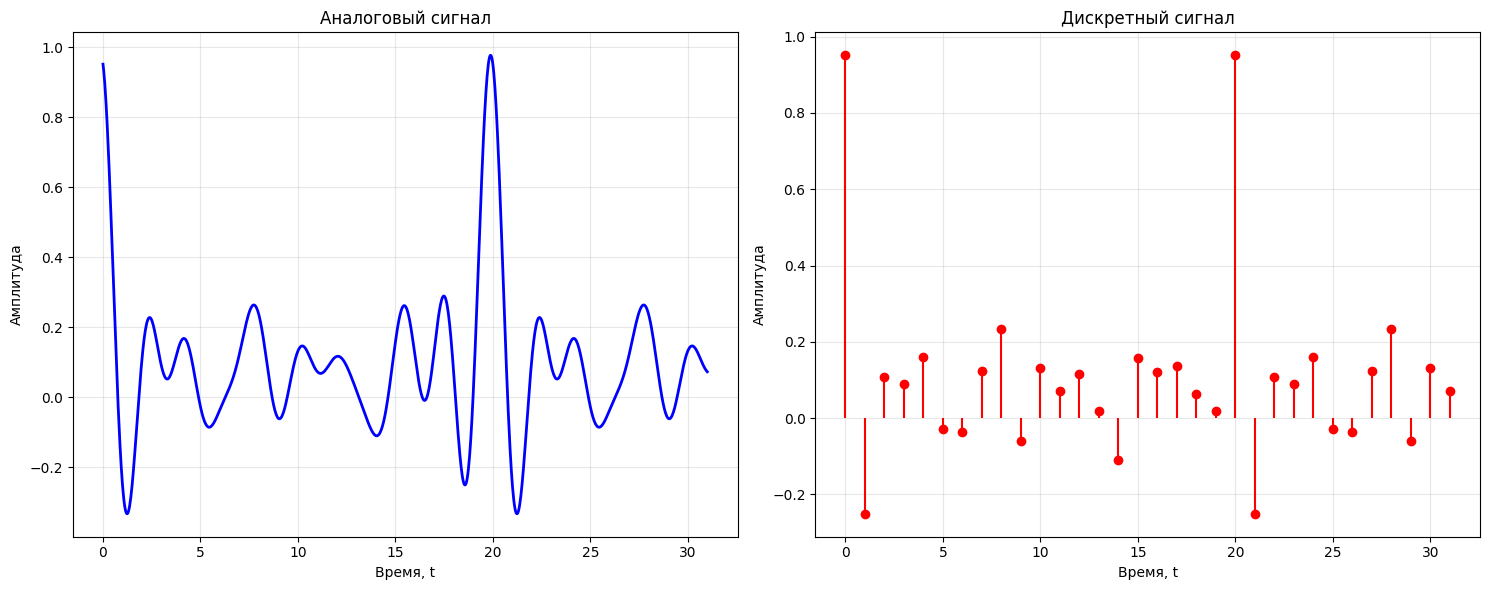

In [35]:
plt.figure(figsize=(15, 6))

# График 1: Аналоговый сигнал
plt.subplot(1, 2, 1)
t_analog = np.linspace(0, N * T, 1000)
signal_analog = np.zeros_like(t_analog)
for k in range(num_harmonics):
    signal_analog += A_k_normalized[k] * np.cos(frequencies[k] * t_analog + phi_k[k])

plt.plot(t_analog, signal_analog, 'b-', linewidth=2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Аналоговый сигнал')
plt.grid(True, alpha=0.3)

# График 2: Дискретный сигнал
plt.subplot(1, 2, 2)
plt.stem(t, signal_discrete, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Дискретный сигнал')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


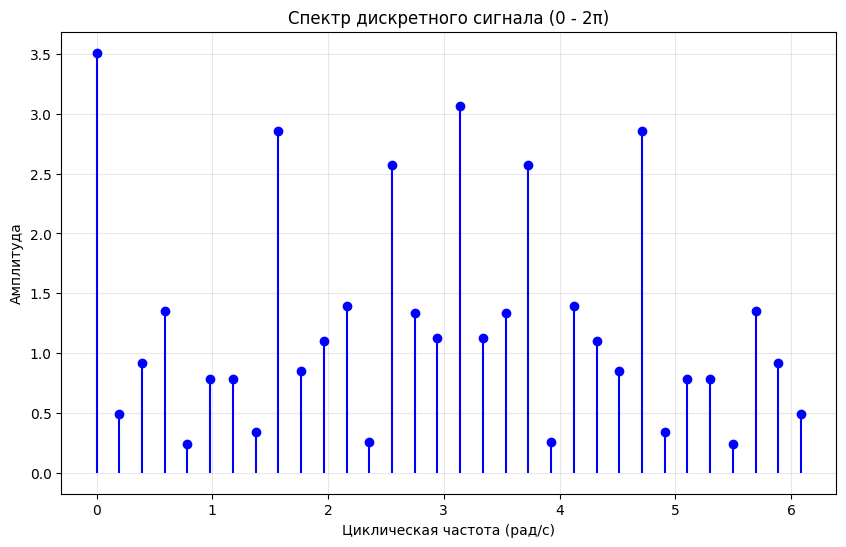

In [36]:
# Вычисление ДПФ
def manual_dft(signal):
    N = len(signal)
    spectrum = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            spectrum[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return spectrum

# Вычисляем спектр
spectrum = manual_dft(signal_discrete)

# Расчет частотной оси (0 - 2π)
freq_axis = [2 * math.pi * i / len(signal_discrete) for i in range(len(signal_discrete))]

# Визуализация спектра
plt.figure(figsize=(10, 6))
plt.stem(freq_axis, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Спектр дискретного сигнала (0 - 2π)')
plt.grid(True, alpha=0.3)
plt.show()


## Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

In [37]:
# Функция для линейного сглаживания
def linear_smoothing(signal, window_size):
    N = len(signal)
    smoothed = np.zeros_like(signal)
    half_window = window_size // 2

    smoothed[0:half_window] = signal[0:half_window]
    smoothed[N-half_window:] = signal[N-half_window:]

    for n in range(half_window, N - half_window):
        if window_size == 5:
            smoothed[n] = (1/5) * (signal[n-2] + signal[n-1] + signal[n] +
                                 signal[n+1] + signal[n+2])
        elif window_size == 9:
            smoothed[n] = (1/9) * (signal[n-4] + signal[n-3] + signal[n-2] +
                                 signal[n-1] + signal[n] + signal[n+1] +
                                 signal[n+2] + signal[n+3] + signal[n+4])

    return smoothed

# Применяем сглаживание по 5 и 9 точкам
smoothed_5 = linear_smoothing(signal_discrete, 5)
smoothed_9 = linear_smoothing(signal_discrete, 9)

## Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

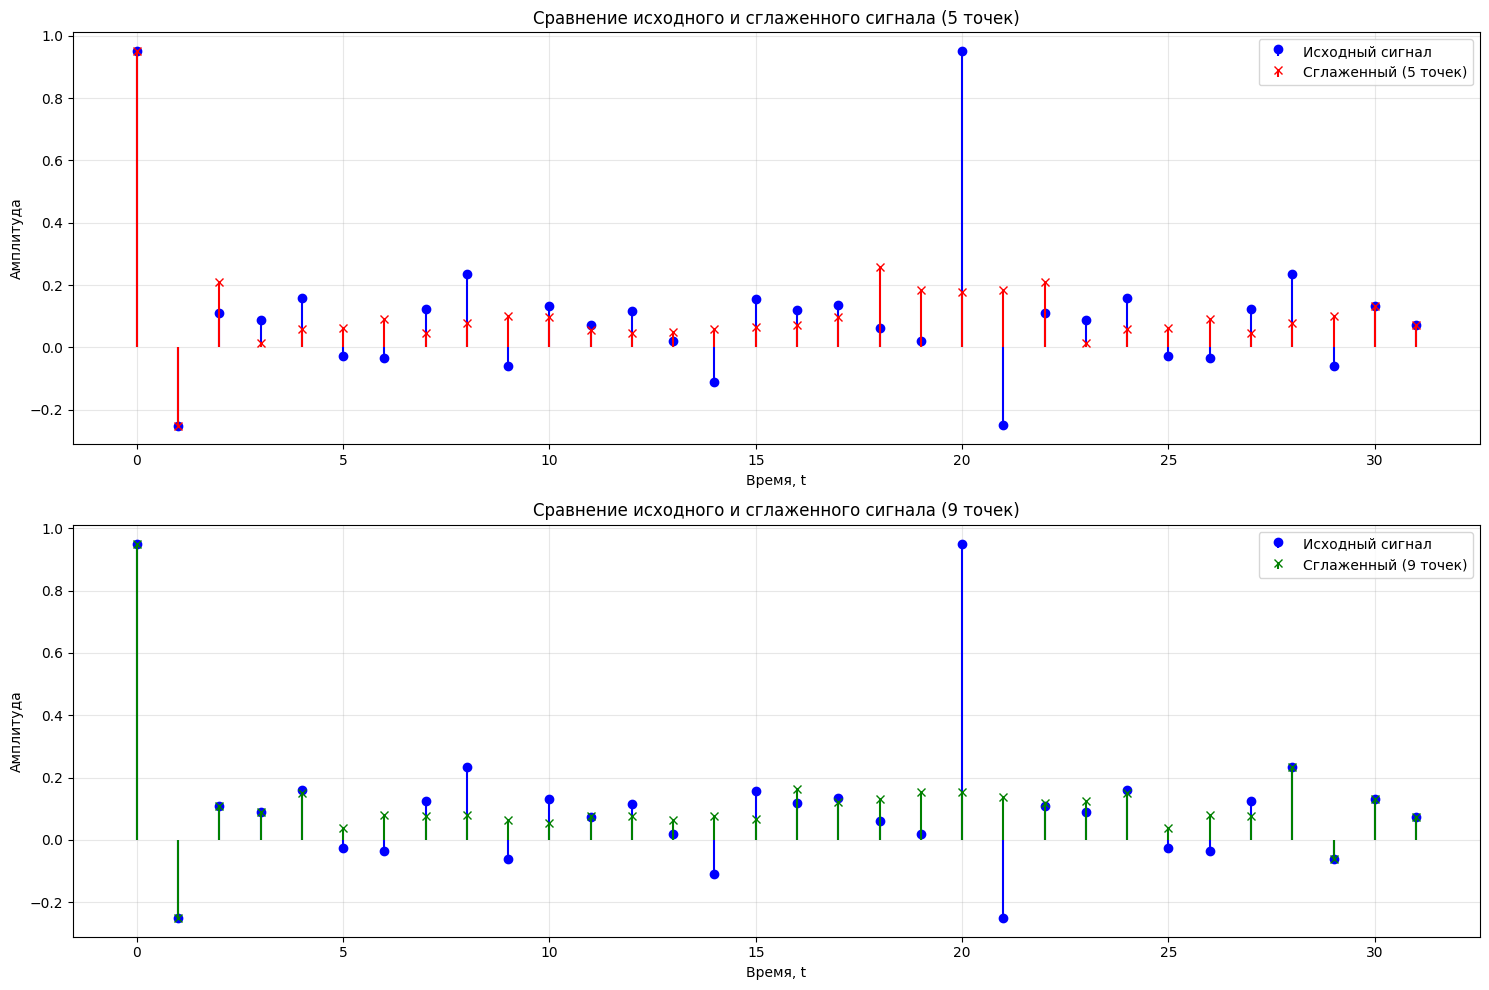

In [38]:
plt.figure(figsize=(15, 10))

# График 1: Сглаживание по 5 точкам
plt.subplot(2, 1, 1)
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t, smoothed_5, linefmt='r-', markerfmt='rx', basefmt=' ', label='Сглаженный (5 точек)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и сглаженного сигнала (5 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сглаживание по 9 точкам
plt.subplot(2, 1, 2)
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t, smoothed_9, linefmt='g-', markerfmt='gx', basefmt=' ', label='Сглаженный (9 точек)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и сглаженного сигнала (9 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

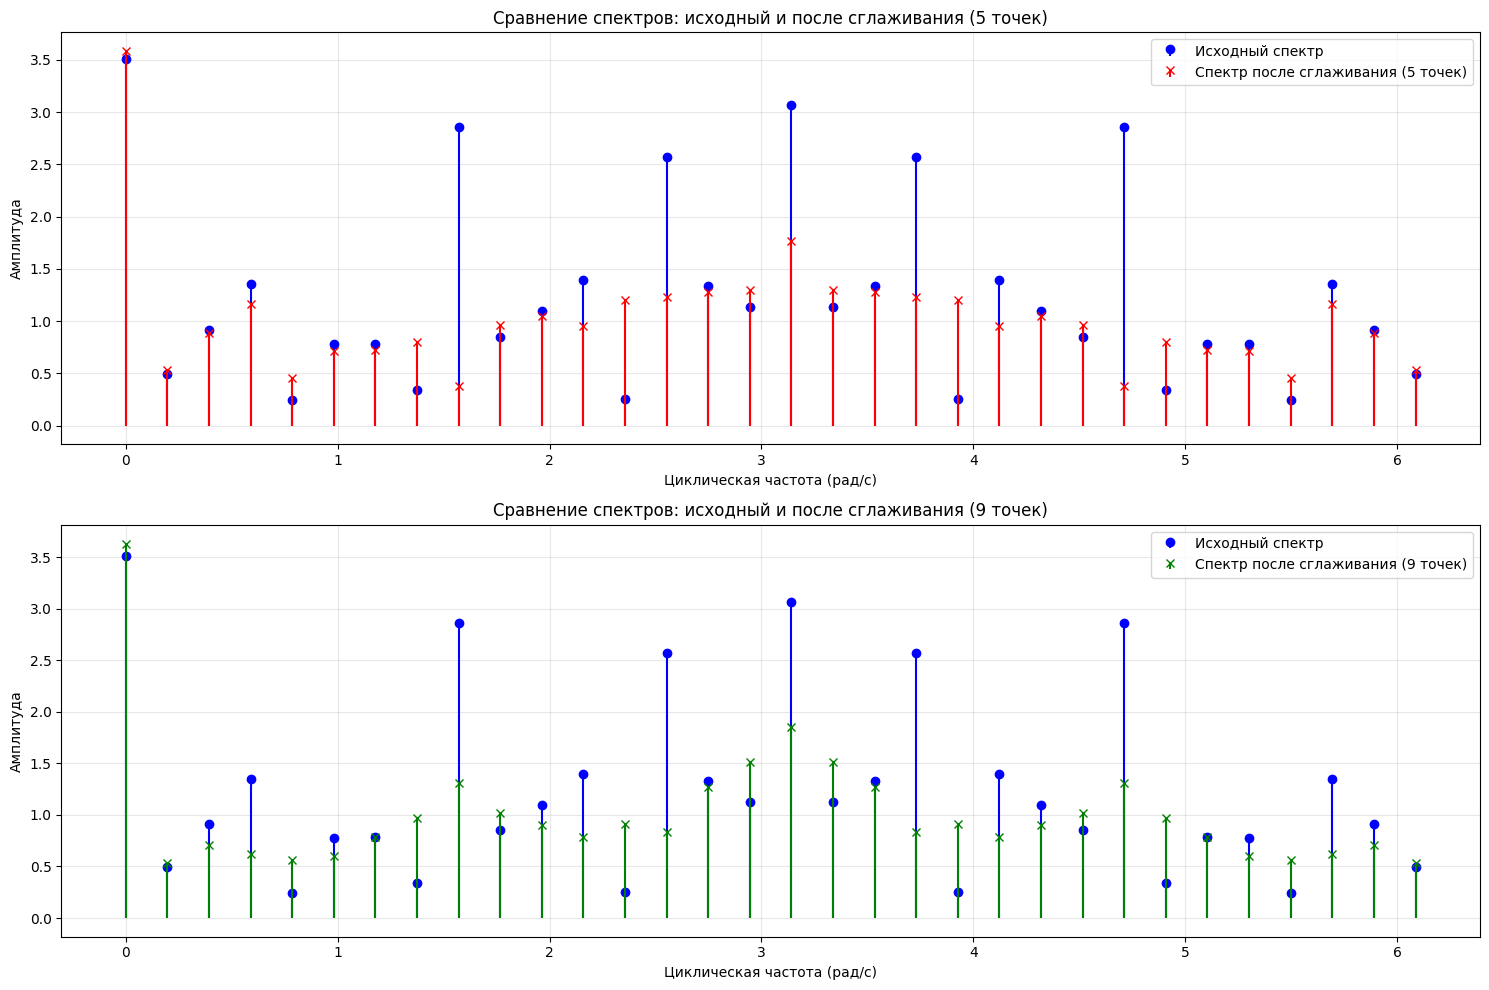

In [39]:
# Вычисляем ДПФ для сглаженных сигналов
spectrum_smoothed_5 = manual_dft(smoothed_5)
spectrum_smoothed_9 = manual_dft(smoothed_9)

# Полный диапазон частот (0-2π)
freq_axis_full = 2 * np.pi * np.arange(len(signal_discrete)) / len(signal_discrete)
plt.figure(figsize=(15, 10))

# График 1: Сравнение спектров (5 точек)
plt.subplot(2, 1, 1)
plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_smoothed_5), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр после сглаживания (5 точек)')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после сглаживания (5 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сравнение спектров (9 точек)
plt.subplot(2, 1, 2)
plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_smoothed_9), linefmt='g-', markerfmt='gx', basefmt=' ',
         label='Спектр после сглаживания (9 точек)')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после сглаживания (9 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


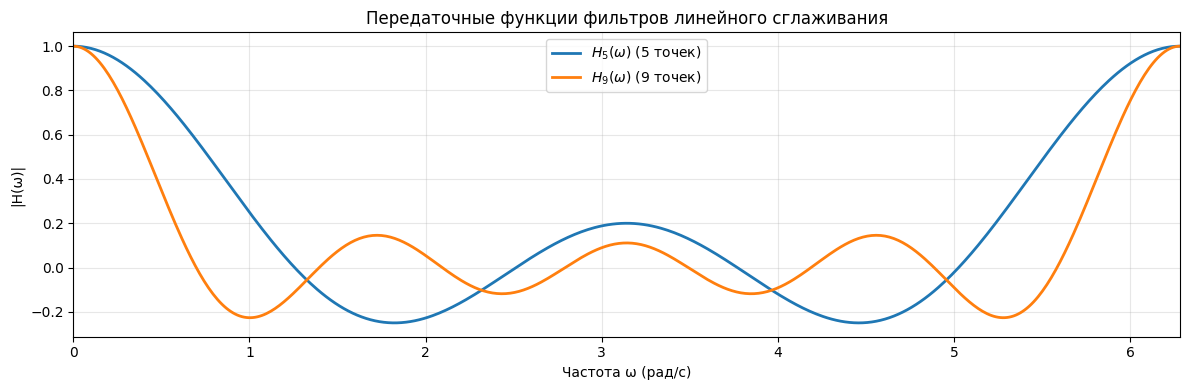

In [40]:
# Аналитическая передаточная функция для скользящего среднего
def H_analytical(w, h):
    if w == 0:
        return 1.0
    return 1 / (2 * h + 1) * np.sin(w * (h + 1/2)) / np.sin(w / 2)

w_range = np.linspace(0, 2 * np.pi, 500)

plt.figure(figsize=(12, 4))

for h in [2, 4]:
    window_size = 2 * h + 1
    plt.plot(w_range, [H_analytical(w, h) for w in w_range],
             linewidth=2,
             label=f'$H_{{{window_size}}}(\\omega)$ ({window_size} точек)')

plt.title('Передаточные функции фильтров линейного сглаживания')
plt.ylabel('|H(ω)|')
plt.xlabel('Частота ω (рад/с)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2*np.pi)
plt.tight_layout()
plt.show()

### Анализ результатов линейного сглаживания

Оба фильтра работают как фильтры нижних частот - это видно и по теоретическим графикам, и по экспериментальным спектрам. Они пропускают низкие частоты и ослабляют высокие.

5-точечный фильтр слабее сглаживает сигнал и лучше сохраняет его детали. 9-точечный фильтр сильнее подавляет высокие частоты, поэтому сглаживает лучше, но некоторые детали сигнала теряются. На графиках спектров видно, что у 9-точечного фильтра высокие частоты уменьшаются больше, чем у 5-точечного. Это соответствует теоретическим кривым H(ω), где у 9-точечного фильтра полоса пропускания уже.Во временной области 9-точечный фильтр дает более плавный сигнал, а 5-точечный сохраняет больше особенностей исходного сигнала. Чем больше точек в фильтре, тем сильнее он подавляет высокие частоты.

## Задание 8
Повторить п. 4–7 для следующих фильтров:
- Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
- Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

## Сглаживание полиномом 2-го порядка для 5 и 9 точек

Рассматриваются передаточные характеристики фильтров, построенных на основе аппроксимации сигнала полиномом второй степени.

**Сглаживание по 5 точкам:**

Формула для расчёта выходного сигнала:

$$
y[n] = \frac{1}{35}\big(-3x[n-2] + 12x[n-1] + 17x[n] + 12x[n+1] - 3x[n+2]\big)
$$

Частотная характеристика данного фильтра представляется в виде:

$$
H(\omega) = \frac{-3\left(e^{2i\omega} + e^{-2i\omega}\right) + 12\left(e^{i\omega} + e^{-i\omega}\right) + 17}{35}
= \frac{17 + 24\cos(\omega) - 6\cos(2\omega)}{35}
$$

---

**Сглаживание по 9 точкам:**

Формула для вычисления сглаженного значения:

$$
y[n] = \frac{1}{231}\big(-21x[n-4] + 14x[n-3] + 39x[n-2] + 54x[n-1] + 59x[n] + 54x[n+1] + 39x[n+2] + 14x[n+3] - 21x[n+4]\big)
$$

Ей соответствует следующая частотная характеристика:

$$
H(\omega) =
\frac{59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega)}{231}
$$

In [41]:
# Фильтр сглаживания полиномом 2-й степени по 5 точкам
def smooth_poly2_5points(signal):
    N = len(signal)
    smoothed = np.zeros_like(signal)

    smoothed[0:2] = signal[0:2]
    smoothed[-2:] = signal[-2:]

    for n in range(2, N-2):
        smoothed[n] = (1/35) * (-3*signal[n-2] + 12*signal[n-1] + 17*signal[n] +
                               12*signal[n+1] - 3*signal[n+2])
    return smoothed

# Фильтр сглаживания полиномом 2-й степени по 9 точкам
def smooth_poly2_9points(signal):
    N = len(signal)
    smoothed = np.zeros_like(signal)

    smoothed[0:4] = signal[0:4]
    smoothed[-4:] = signal[-4:]

    for n in range(4, N-4):
        smoothed[n] = (1/231) * (-21*signal[n-4] + 14*signal[n-3] + 39*signal[n-2] +
                                54*signal[n-1] + 59*signal[n] + 54*signal[n+1] +
                                39*signal[n+2] + 14*signal[n+3] - 21*signal[n+4])
    return smoothed

# Применяем фильтры
smoothed_poly2_5 = smooth_poly2_5points(signal_discrete)
smoothed_poly2_9 = smooth_poly2_9points(signal_discrete)

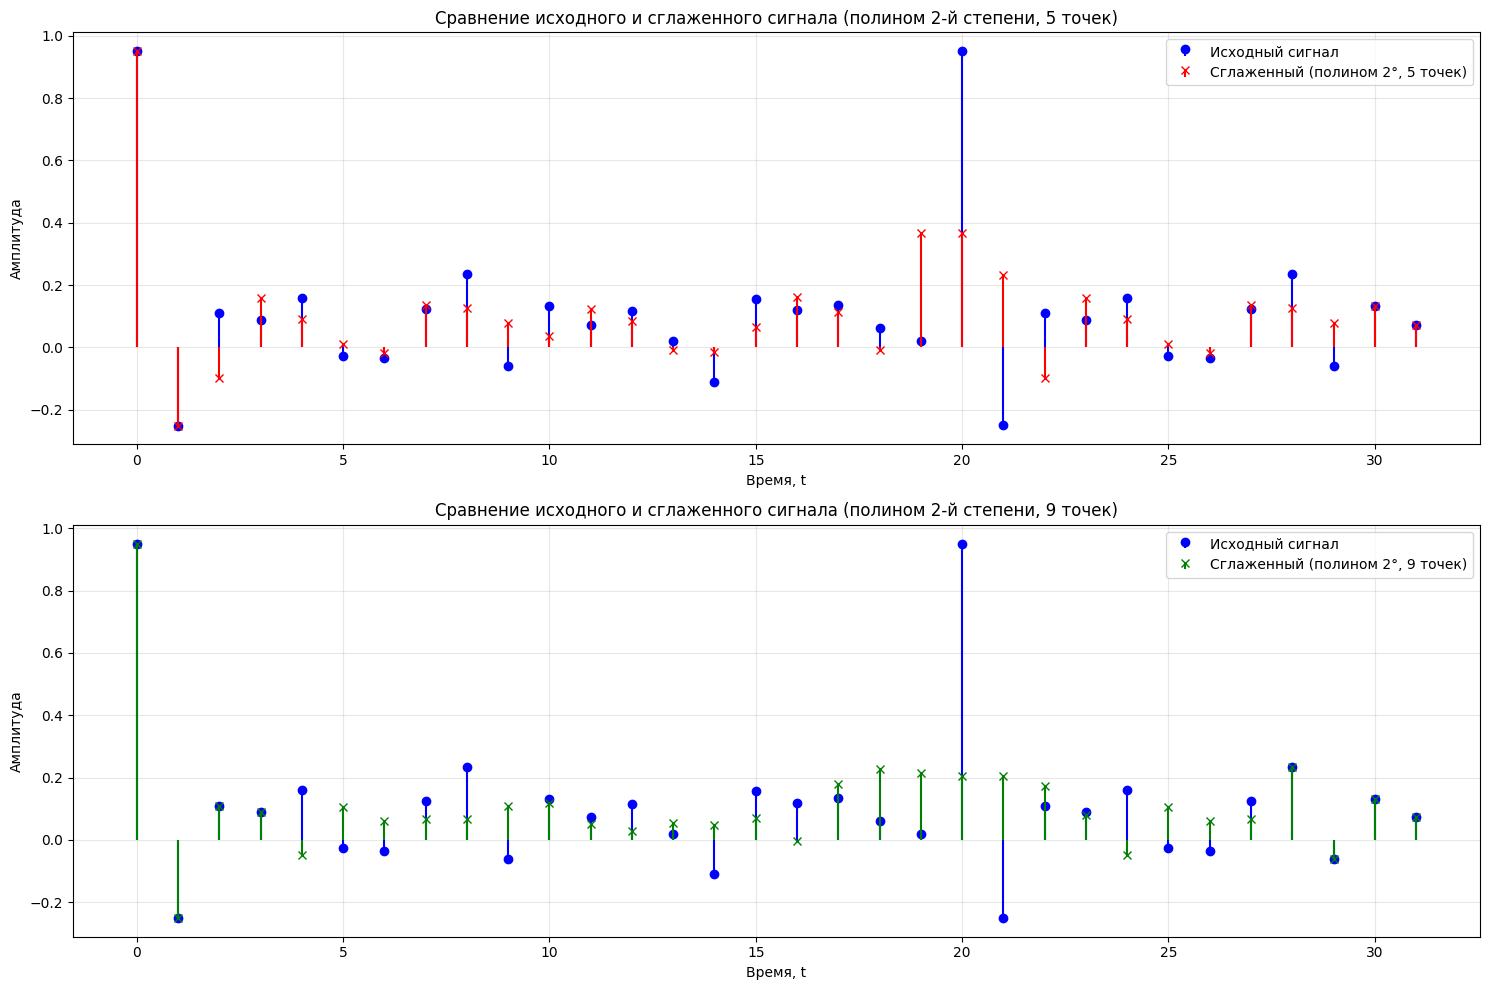

In [42]:
# Визуализация сглаженных сигналов (полином 2-й степени)

plt.figure(figsize=(15, 10))

# График 1: Сглаживание по 5 точкам
plt.subplot(2, 1, 1)
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t, smoothed_poly2_5, linefmt='r-', markerfmt='rx', basefmt=' ', label='Сглаженный (полином 2°, 5 точек)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и сглаженного сигнала (полином 2-й степени, 5 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сглаживание по 9 точкам
plt.subplot(2, 1, 2)
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t, smoothed_poly2_9, linefmt='g-', markerfmt='gx', basefmt=' ', label='Сглаженный (полином 2°, 9 точек)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и сглаженного сигнала (полином 2-й степени, 9 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

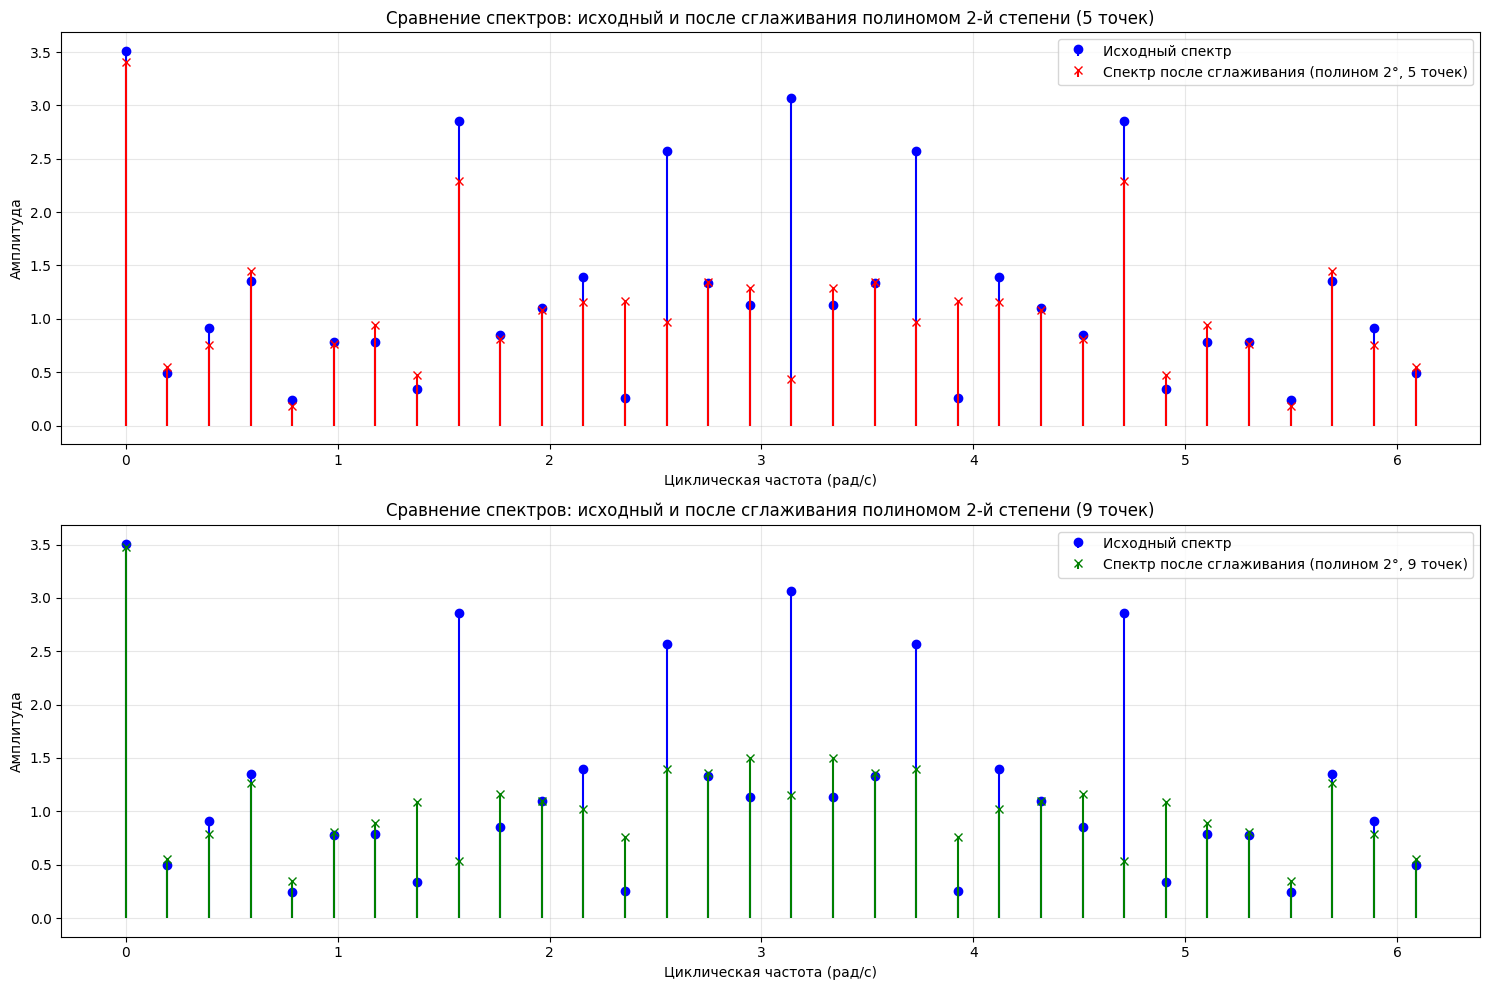

In [43]:
# Спектры после фильтрации полиномом 2-й степени

# Вычисляем ДПФ для сглаженных сигналов
spectrum_poly2_5 = manual_dft(smoothed_poly2_5)
spectrum_poly2_9 = manual_dft(smoothed_poly2_9)

# Полный диапазон частот (0-2π)
freq_axis_full = 2 * np.pi * np.arange(len(signal_discrete)) / len(signal_discrete)
plt.figure(figsize=(15, 10))

# График 1: Сравнение спектров (5 точек)
plt.subplot(2, 1, 1)
plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_poly2_5), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр после сглаживания (полином 2°, 5 точек)')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после сглаживания полиномом 2-й степени (5 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сравнение спектров (9 точек)
plt.subplot(2, 1, 2)
plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_poly2_9), linefmt='g-', markerfmt='gx', basefmt=' ',
         label='Спектр после сглаживания (полином 2°, 9 точек)')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после сглаживания полиномом 2-й степени (9 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

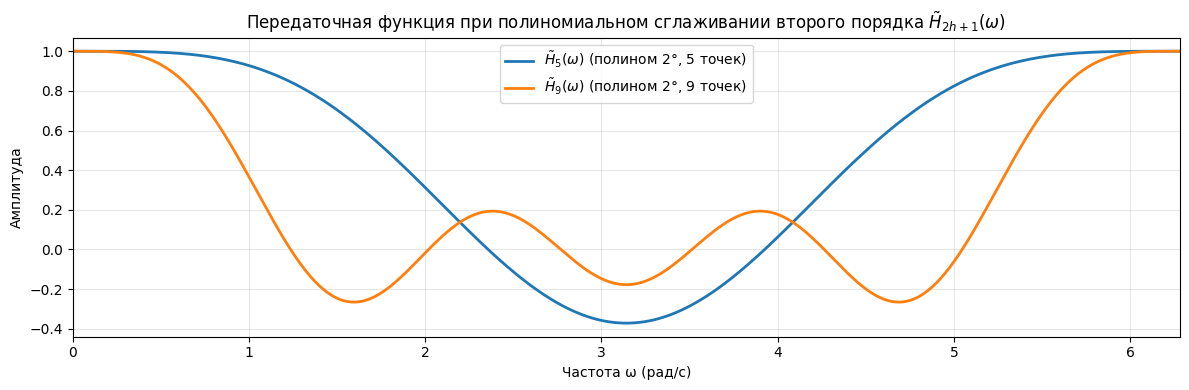

In [44]:
# Теоретический график передаточных функций для полинома 2-й степени

def H_poly2_analytical(w, h):
    res = -3 * h ** 2 - 3 * h + 1

    for k in range(1, h + 1):
        res = res + 2 * (5 * k ** 2 - 3 * h ** 2 - 3 * h + 1) * np.cos(w * k)

    return 3 / (-8 * h ** 3 - 12 * h ** 2 + 2 * h + 3) * res

# Диапазон частот (0-2π)
w_range = np.linspace(0, 2 * np.pi, 500)
plt.figure(figsize=(12, 4))

for h, points in [(2, '5 точек'), (4, '9 точек')]:
    window_size = 2 * h + 1
    plt.plot(w_range, [H_poly2_analytical(w, h) for w in w_range],
             linewidth=2,
             label=f'$\\tilde{{H}}_{{{window_size}}}(\\omega)$ (полином 2°, {points})')

plt.title('Передаточная функция при полиномиальном сглаживании второго порядка $\\tilde{H}_{2h+1}(\\omega)$')
plt.ylabel('Амплитуда')
plt.xlabel('Частота ω (рад/с)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2*np.pi)
plt.tight_layout()
plt.show()

### Анализ результатов сглаживания полиномом 2-го порядка

Фильтры на основе полинома 2-го степени также работают как фильтры нижних частот, но их частотные характеристики отличаются от линейных фильтров. Теоретические графики H(ω) показывают более сложную форму АЧХ с дополнительными изгибами. Экспериментальные результаты хорошо согласуются с теоретическими характеристиками - форма спада спектров соответствует расчетным кривым H(ω).

5-точечный фильтр хорошо сохраняет средние частоты, что видно по плавному спаду на теоретической характеристике. На спектральных графиках это проявляется в том, что средние частоты подавляются меньше, чем при линейном сглаживании. Сигнал после фильтрации сохраняет больше деталей, особенно на участках с плавными изменениями.

9-точечный фильтр имеет более узкую полосу пропускания и сильнее подавляет высокие частоты. На спектрах видно, что амплитуды высокочастотных компонент уменьшаются заметнее. При этом фильтр лучше справляется с сохранением квадратичных составляющих сигнала благодаря полиномиальной аппроксимации второго порядка.

Во временной области оба фильтра лучше сохраняют кривизну сигнала по сравнению с линейными. 9-точечный фильтр дает более гладкий результат, но может немного искажать резкие изменения сигнала. 5-точечный фильтр сохраняет больше особенностей исходного сигнала.


## Сглаживание полиномом 4-го порядка для 7 и 11 точек

Рассматриваются передаточные характеристики фильтров, построенных на основе аппроксимации сигнала полиномом четвертой степени.

**Сглаживание по 7 точкам:**

Формула для расчёта выходного сигнала:

$$
y[n] = \frac{1}{231}\big(5x[n-3] - 30x[n-2] + 75x[n-1] + 131x[n] + 75x[n+1] - 30x[n+2] + 5x[n+3]\big)
$$

Частотная характеристика данного фильтра представляется в виде:

$$
H(\omega) = \frac{5\left(e^{3i\omega} + e^{-3i\omega}\right) - 30\left(e^{2i\omega} + e^{-2i\omega}\right) + 75\left(e^{i\omega} + e^{-i\omega}\right) + 131}{231}
$$

$$
H(\omega) = \frac{131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega)}{231}
$$

---

**Сглаживание по 11 точкам:**

Формула для вычисления сглаженного значения:

$$
y[n] = \frac{1}{429}\big(18x[n-5] - 45x[n-4] - 10x[n-3] + 60x[n-2] + 120x[n-1] + 143x[n] + 120x[n+1] + 60x[n+2] - 10x[n+3] - 45x[n+4] + 18x[n+5]\big)
$$

Ей соответствует следующая частотная характеристика:

$$
H(\omega) = \frac{18\left(e^{5i\omega} + e^{-5i\omega}\right) - 45\left(e^{4i\omega} + e^{-4i\omega}\right) - 10\left(e^{3i\omega} + e^{-3i\omega}\right) + 60\left(e^{2i\omega} + e^{-2i\omega}\right) + 120\left(e^{i\omega} + e^{-i\omega}\right) + 143}{429}
$$

$$
H(\omega) = \frac{143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega)}{429}
$$

In [45]:
# Фильтр сглаживания полиномом 4-й степени по 7 точкам

def smooth_poly4_7points(signal):
    N = len(signal)
    smoothed = np.zeros_like(signal)

    smoothed[0:3] = signal[0:3]
    smoothed[-3:] = signal[-3:]

    for n in range(3, N-3):
        smoothed[n] = (1/231) * (5*signal[n-3] - 30*signal[n-2] + 75*signal[n-1] +
                               131*signal[n] + 75*signal[n+1] - 30*signal[n+2] +
                               5*signal[n+3])
    return smoothed

# Фильтр сглаживания полиномом 4-й степени по 11 точкам
def smooth_poly4_11points(signal):
    N = len(signal)
    smoothed = np.zeros_like(signal)

    smoothed[0:5] = signal[0:5]
    smoothed[-5:] = signal[-5:]

    for n in range(5, N-5):
        smoothed[n] = (1/429) * (18*signal[n-5] - 45*signal[n-4] - 10*signal[n-3] +
                               60*signal[n-2] + 120*signal[n-1] + 143*signal[n] +
                               120*signal[n+1] + 60*signal[n+2] - 10*signal[n+3] -
                               45*signal[n+4] + 18*signal[n+5])
    return smoothed

# Применяем фильтры
smoothed_poly4_7 = smooth_poly4_7points(signal_discrete)
smoothed_poly4_11 = smooth_poly4_11points(signal_discrete)

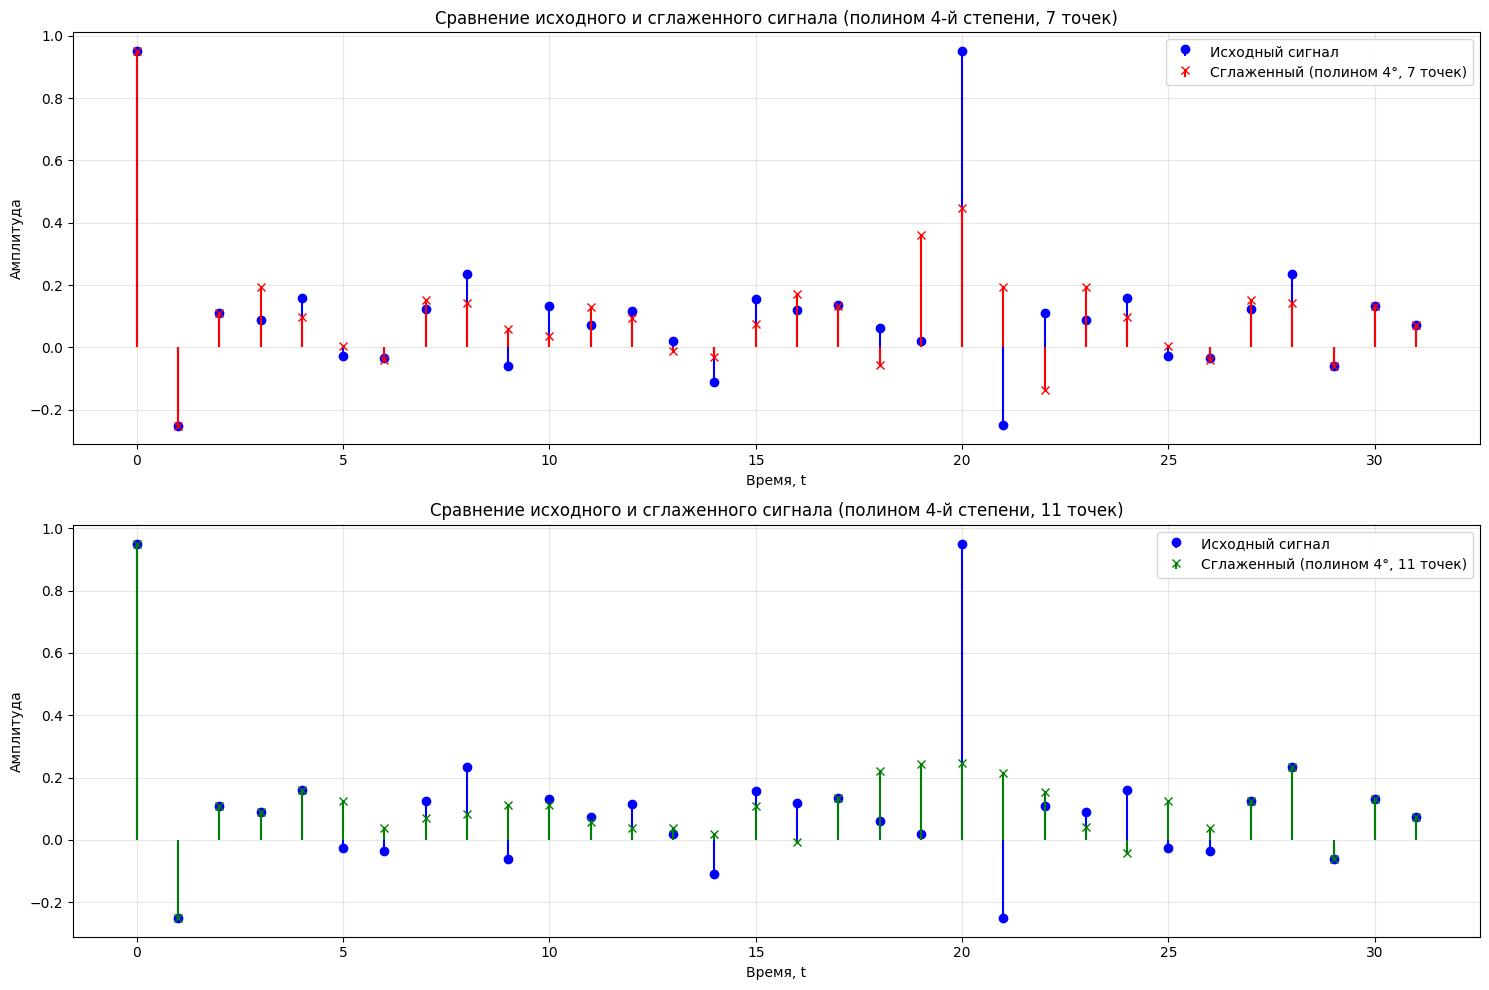

In [46]:
# Визуализация сглаженных сигналов (полином 4-й степени)

plt.figure(figsize=(15, 10))

# График 1: Сглаживание по 7 точкам
plt.subplot(2, 1, 1)
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t, smoothed_poly4_7, linefmt='r-', markerfmt='rx', basefmt=' ', label='Сглаженный (полином 4°, 7 точек)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и сглаженного сигнала (полином 4-й степени, 7 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сглаживание по 11 точкам
plt.subplot(2, 1, 2)
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t, smoothed_poly4_11, linefmt='g-', markerfmt='gx', basefmt=' ', label='Сглаженный (полином 4°, 11 точек)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и сглаженного сигнала (полином 4-й степени, 11 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

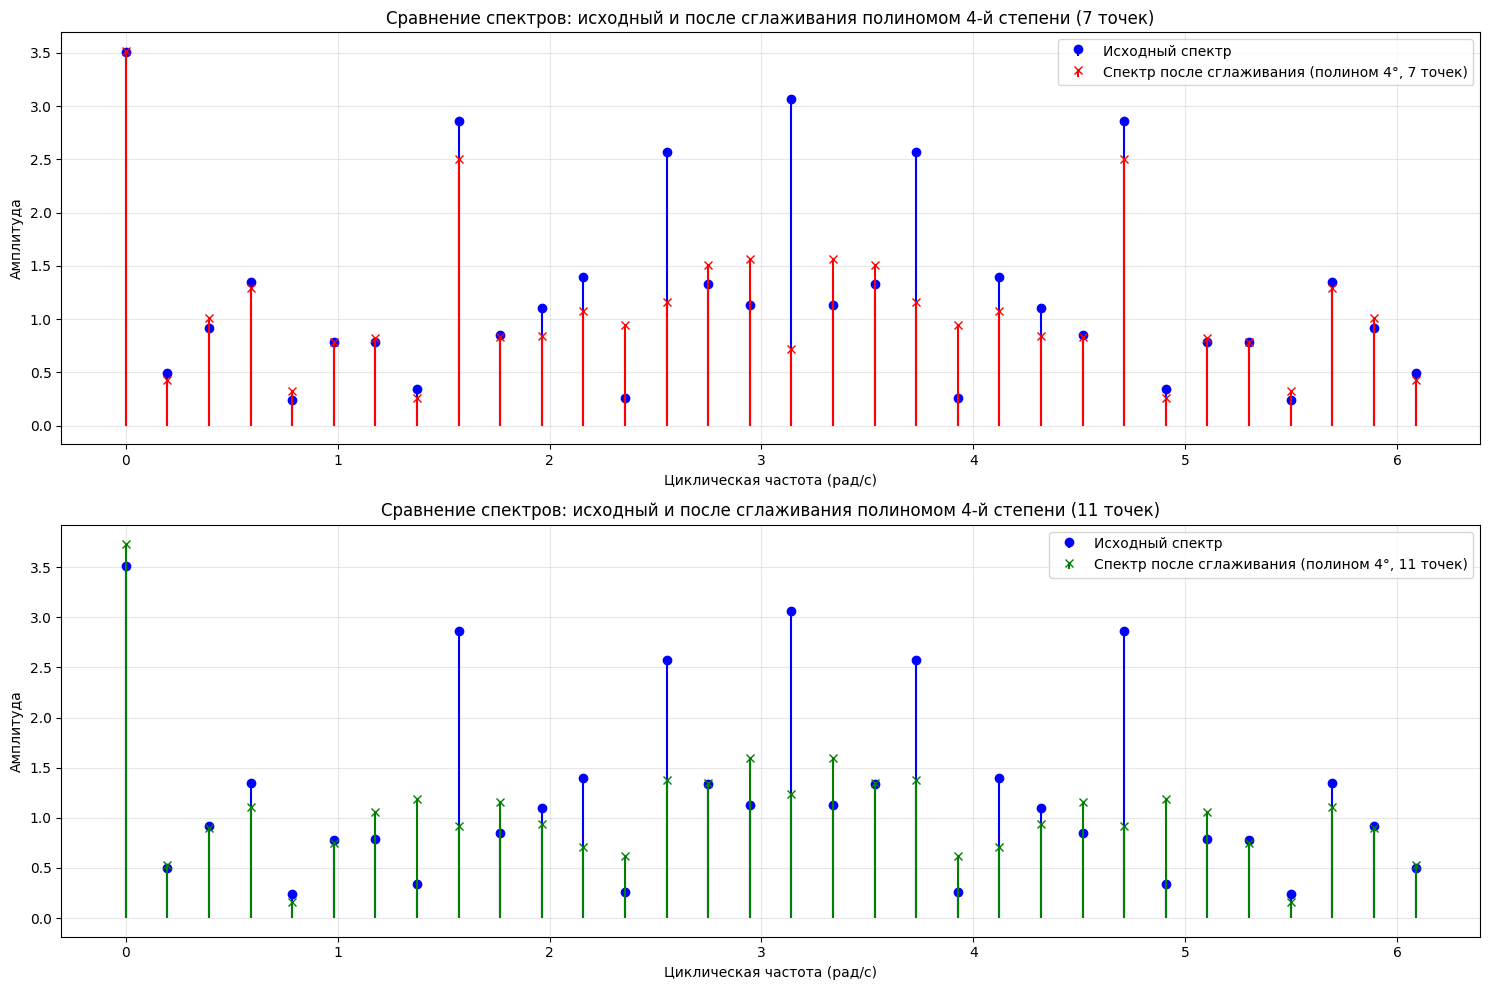

In [47]:
# Спектры после фильтрации полиномом 4-й степени

# Вычисляем ДПФ для сглаженных сигналов
spectrum_poly4_7 = manual_dft(smoothed_poly4_7)
spectrum_poly4_11 = manual_dft(smoothed_poly4_11)

# Визуализация спектров в диапазоне 0-2π
plt.figure(figsize=(15, 10))

# График 1: Сравнение спектров (7 точек)
plt.subplot(2, 1, 1)
plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_poly4_7), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр после сглаживания (полином 4°, 7 точек)')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после сглаживания полиномом 4-й степени (7 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сравнение спектров (11 точек)
plt.subplot(2, 1, 2)
plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_poly4_11), linefmt='g-', markerfmt='gx', basefmt=' ',
         label='Спектр после сглаживания (полином 4°, 11 точек)')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после сглаживания полиномом 4-й степени (11 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

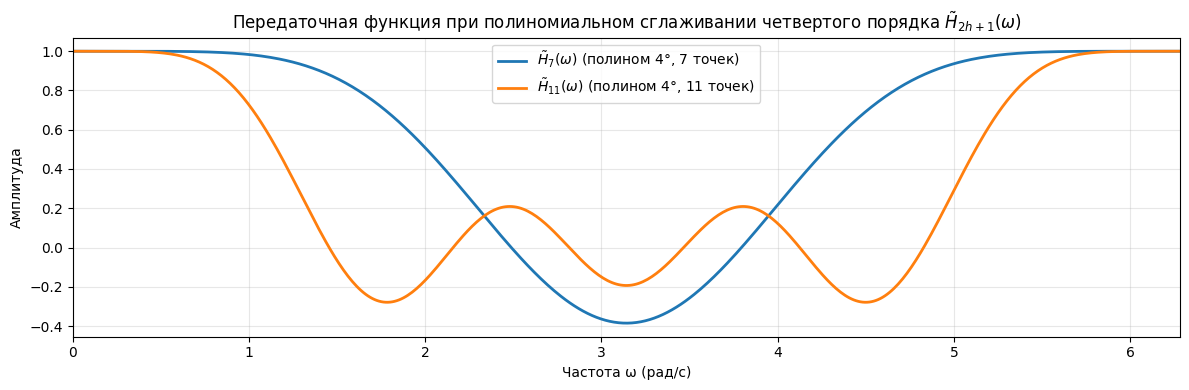

In [48]:
# Теоретический график передаточных функций для полинома 4-й степени

def H_poly4_analytical(w, h):
    term1 = 15 * h**4 + 30 * h**3 - 35 * h**2 - 50 * h + 12

    sum_term = 0
    for k in range(1, h + 1):
        coefficient = (15 * h**4 + 30 * h**3 - 35 * h**2 - 50 * h + 12 -
                      (70 * h**2 + 70 * h - 105) * k**2 + 63 * k**4)
        sum_term += coefficient * np.cos(w * k)

    denominator = 128 * h**5 + 320 * h**4 - 320 * h**3 - 800 * h**2 + 72 * h + 180
    return (15 / denominator) * (term1 + 2 * sum_term)

# Диапазон частот (0-2π)
w_range = np.linspace(0, 2 * np.pi, 500)
plt.figure(figsize=(12, 4))

for h, points in [(3, '7 точек'), (5, '11 точек')]:
    window_size = 2 * h + 1
    plt.plot(w_range, [H_poly4_analytical(w, h) for w in w_range],
             linewidth=2,
             label=f'$\\tilde{{H}}_{{{window_size}}}(\\omega)$ (полином 4°, {points})')

plt.title('Передаточная функция при полиномиальном сглаживании четвертого порядка $\\tilde{H}_{2h+1}(\\omega)$')
plt.ylabel('Амплитуда')
plt.xlabel('Частота ω (рад/с)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2*np.pi)
plt.tight_layout()
plt.show()

### Анализ результатов сглаживания полиномом 4-го порядка

Фильтры на основе полинома 4-й степени лучше всего справляются с сглаживанием сложных сигналов. Теоретические графики H(ω) имеют плавный спад в области низких частот и более резкое подавление высоких частот. Экспериментальные спектры соответствуют теоретическим графикам - наблюдается плавное уменьшение амплитуд с ростом частоты, соответствующее расчетным H(ω).

7-точечный фильтр хорошо сохраняет низкие и средние частоты, что видно по плавной форме теоретической характеристики. На спектральных графиках наблюдается умеренное подавление высокочастотных компонент при хорошем сохранении основной структуры сигнала.

11-точечный фильтр демонстрирует наиболее эффективное подавление высоких частот среди всех рассмотренных фильтров. Его теоретическая характеристика имеет самую узкую полосу пропускания. На экспериментальных спектрах это проявляется в значительном уменьшении амплитуд высокочастотных гармоник.

Во временной области полиномиальные фильтры 4-й степени обеспечивают высококачественное сглаживание, хорошо сохраняя плавные изменения сигнала. 11-точечный фильтр дает очень гладкий выходной сигнал, может слегка сглаживать резкие пики. 7-точечный фильтр сохраняет больше деталей при хорошем общем сглаживании.

## Выводы

В ходе работы было исследовано применение полиномиальных фильтров для сглаживания дискретных сигналов. Основная часть работы включала применение различных сглаживающих фильтров: линейных (5 и 9 точек), полиномиальных 2-го порядка (5 и 9 точек) и полиномиальных 4-го порядка (7 и 11 точек). Для каждого фильтра проводился анализ результатов как во временной, так и в частотной области. Экспериментально подтверждено, что все рассмотренные фильтры обладают свойствами фильтров нижних частот - они подавляют высокочастотные составляющие и сохраняют низкочастотные компоненты сигнала. Установлено, что с увеличением размера окна фильтра сглаживание становится более эффективным, но при этом могут теряться некоторые детали сигнала. Полиномиальные фильтры высших порядков демонстрируют более качественное сглаживание при лучшем сохранении формы сигнала по сравнению с линейными фильтрами.